In [1]:
%matplotlib inline

import os
import shapely
import earthaccess
import numpy as np
import rasterio as rio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
import os
print(os.getcwd())

C:\Users\M533\Assignment


In [12]:
# Load the Area of Interest (AOI) shapefile into a GeoDataFrame
AOI = gpd.read_file('Data_files/Area_of_interest.shp')

In [13]:
# Check if the CRS is a projected coordinate system (not WGS84)
if AOI.crs != 'epsg:4326':
    print("Attention: The coordinate system of 'search_area' must be in geographic coordinates (WGS84, EPSG:4326). "
          "Please convert the CRS to WGS84 before proceeding with earthaccess data search to prevent runtime errors.")
else:
    print("The CRS of 'search_area' is correctly set to WGS84 (EPSG:4326). Proceeding with earthaccess data search.")

Attention: The coordinate system of 'search_area' must be in geographic coordinates (WGS84, EPSG:4326). Please convert the CRS to WGS84 before proceeding with earthaccess data search to prevent runtime errors.


In [14]:
# Transform the CRS to WGS84 (EPSG:4326)
AOI_wgs84 = AOI.to_crs('+proj=longlat +datum=WGS84')

In [15]:
AOI_wgs84.crs

<Geographic 2D CRS: +proj=longlat +datum=WGS84 +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

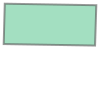

In [16]:
earthaccess.login(strategy='netrc')

outline = AOI_wgs84['geometry'].unary_union

# get the min x, min y, max x, max y values of the Area of Interest
outline.bounds

search_area = shapely.geometry.polygon.orient(outline, sign=1) # a sign of 1 means oriented counter-clockwise

search_area # this doesn't actually change the geometry, just the order of the vertices

In [17]:
from earthaccess import DataCollections
import datetime

# Define the time range for the data search
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

In [18]:
datasets = earthaccess.search_datasets(
    keyword="Sentinel-2", # search for datasets that match the keyword "Sentinel-2"
    polygon=search_area.exterior.coords, # search for datasets that intersect AOI,
    temporal=(start_date, end_date)
)

Datasets found: 5


In [19]:
dataset = datasets[0] # get the first result
dataset.get_umm('EntryTitle') # fill this in with the metadata field that you want

'HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30m v2.0'

In [20]:
ds_name = dataset.get_umm('ShortName') # fill in the following with the correct field name to return the short name of the dataset

print(f"Dataset short name: {ds_name}")

Dataset short name: HLSS30


In [21]:
results = earthaccess.search_data(
    short_name=ds_name, # search for Sentinel-2 granules
    polygon=search_area.exterior.coords, # search for images that intersect our AOI
    count=10, # only show the first 10 results
    temporal=(start_date, end_date)
)

Granules found: 135


In [22]:
granule = results[1]  # Indexing starts at 0, so 1 is the second item
granule

Collection: {'EntryTitle': 'HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30m v2.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 17.47719812, 'Latitude': 40.53618553}, {'Longitude': 17.51453839, 'Latitude': 41.5243447}, {'Longitude': 16.19896961, 'Latitude': 41.54559377}, {'Longitude': 16.18114793, 'Latitude': 40.55671174}, {'Longitude': 17.47719812, 'Latitude': 40.53618553}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2022-01-04T09:49:14.490Z', 'EndingDateTime': '2022-01-04T09:49:14.490Z'}}
Size(MB): 185.99097728729248
Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B12.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.Fmask.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.SZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B05.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B03.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B11.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B07.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B8A.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.VAA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B06.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B09.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.VZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B08.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B01.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B10.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B02.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.SAA.tif']

In [ ]:
# Define the path to the Data_files directory
data_files_directory = "Data_files"

# Create the full path for the new directory inside Data_files
new_directory_path = os.path.join(data_files_directory, ds_name)

# Create the new folder inside Data_files
os.makedirs(new_directory_path, exist_ok=True)

# Download the second granule into the new directory
downloaded_file = earthaccess.download([granule], new_directory_path)

In [24]:
# Open the raster file and check its CRS
src = rio.open('Data_files/HLSS30/HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif')

src.crs

CRS.from_wkt('PROJCS["UTM Zone 33, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

C:\Users\M533\AppData\Local\Temp\ipykernel_33448\1702595659.py:12: RuntimeWarning: divide by zero encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\M533\AppData\Local\Temp\ipykernel_33448\1702595659.py:12: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


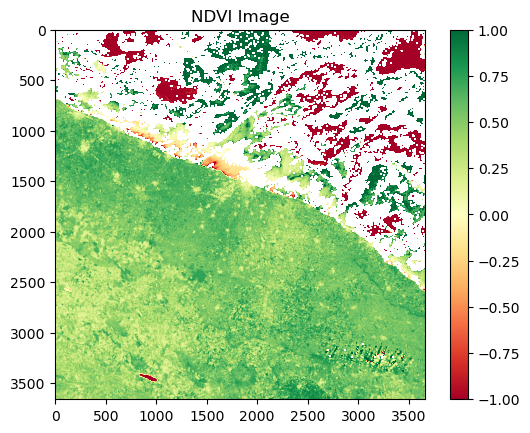

In [26]:
from rasterio.mask import mask

# Open the red and NIR bands
with rio.open('Data_files/HLSS30/HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif') as red_src, \
     rio.open('Data_files/HLSS30/HLS.S30.T33TXF.2022004T094309.v2.0.B08.tif') as nir_src:

    # Read the raster data for the bands
    red = red_src.read(1)
    nir = nir_src.read(1)

    # Calculate NDVI
    ndvi = (nir - red) / (nir + red)

    # Plot NDVI
    plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title('NDVI Image')
    plt.show()

In [ ]:
# Define the output path for the NDVI raster file
output_ndvi_path = 'Data_files/NDVI_output.tif'

# Create a new raster file for the NDVI data
with rasterio.open(output_ndvi_path, 'w', driver='GTiff', height=ndvi.shape[0], width=ndvi.shape[1],
                       count=1, dtype=ndvi.dtype, crs=red_src.crs, transform=red_src.transform) as dst:
    dst.write(ndvi, 1)

print(f"NDVI data saved to {output_ndvi_path}")

In [29]:
# Load the NDVI raster (replace 'Data_files/NDVI_output.tif' with your actual NDVI raster file)
ndvi_path = 'Data_files/NDVI_output.tif'
with rio.open(ndvi_path) as ndvi_src:
    ndvi_data = ndvi_src.read(1)
    ndvi_transform = ndvi_src.transform

    # Load the search area polygon (replace 'search_area.shp' with your actual shapefile)
    #AOI_path = 'Data_files/Area_of_interest.shp'
    #AOI = gpd.read_file(AOI_path)

    # Clip the NDVI data to the search area
    clipped_ndvi_data, clipped_ndvi_transform = mask(ndvi_src, shapes=AOI.geometry, crop=True)

    # Define the output path for the clipped NDVI raster file
    clipped_ndvi_path = 'Data_files/clipped_ndvi.tif'
    with rio.open(clipped_ndvi_path, 'w', **ndvi_src.meta) as clipped_ndvi_dst:
        clipped_ndvi_dst.write(clipped_ndvi_data)

    print(f"Clipped NDVI saved to {clipped_ndvi_path}")

Clipped NDVI saved to Data_files/clipped_ndvi.tif


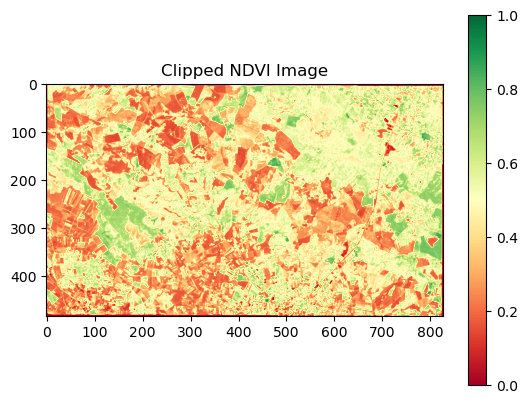

In [32]:
# Plot the clipped NDVI
plt.imshow(clipped_ndvi_data[0], cmap='RdYlGn', vmin=0, vmax=1)
plt.colorbar()
plt.title('Clipped NDVI Image')
plt.show()